In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./removingGP/"


df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,0.069311,0.043897,0.039305,0.049137,0.047217,0.049977,0.037768,0.038805,-0.007539,2362,0.118448,0.091114,0.089282,0.020174,-0.003320,-0.010673
1,0.033968,0.118572,0.049086,0.054553,0.051913,0.056899,0.046610,0.100284,0.008571,772,0.088522,0.170485,0.105986,-0.020585,0.066659,-0.007813
2,-0.096456,0.052244,0.134162,0.052129,0.049662,0.054129,0.005943,0.044592,0.077661,743,-0.044327,0.101906,0.188291,-0.148585,0.002583,0.080033
3,0.052471,0.047990,0.114674,0.050508,0.047978,0.052342,0.063846,-0.002172,0.055211,736,0.102979,0.095968,0.167016,0.001963,0.000012,0.062332
4,0.122922,0.025827,0.092622,0.050364,0.047791,0.052142,0.102154,-0.037059,0.043870,787,0.173286,0.073618,0.144764,0.072558,-0.021964,0.040480


<IPython.core.display.Javascript object>


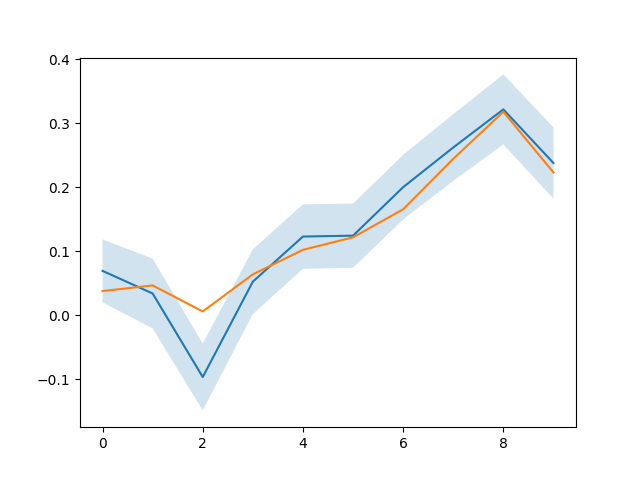

<IPython.core.display.Javascript object>


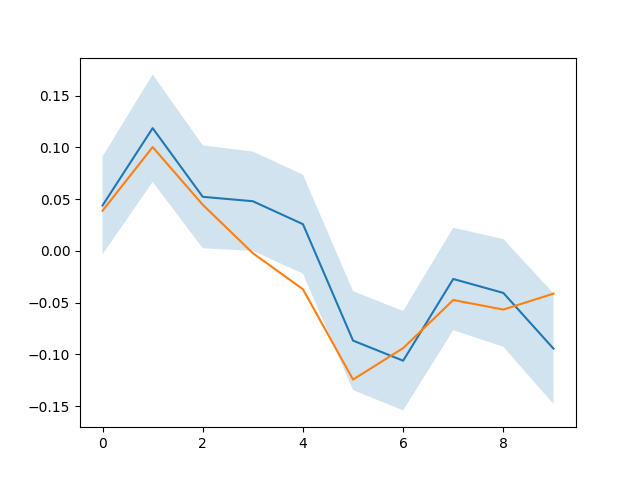

<IPython.core.display.Javascript object>


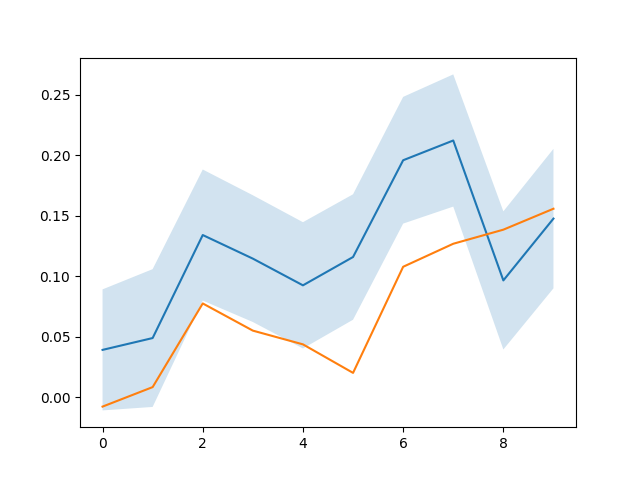

In [3]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


0.006483173537299649


<IPython.core.display.Javascript object>


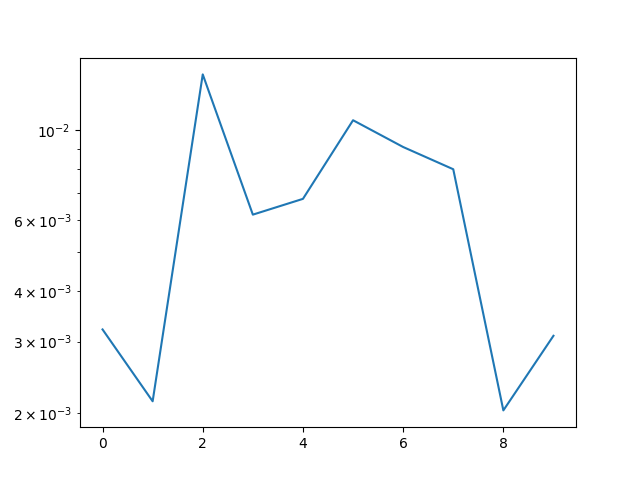

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


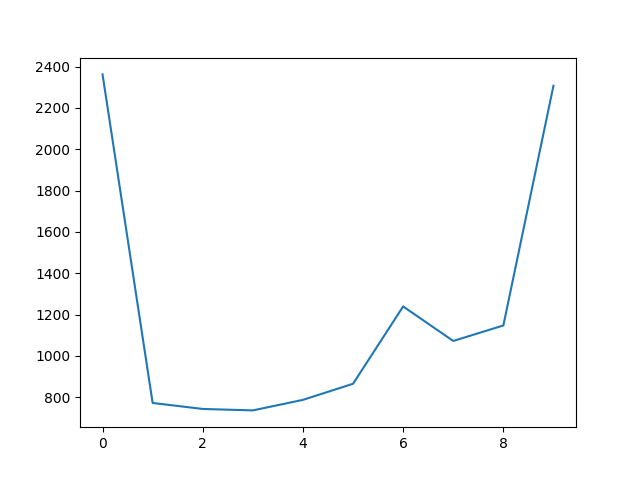

12030 ms


In [5]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time']), "ms")
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


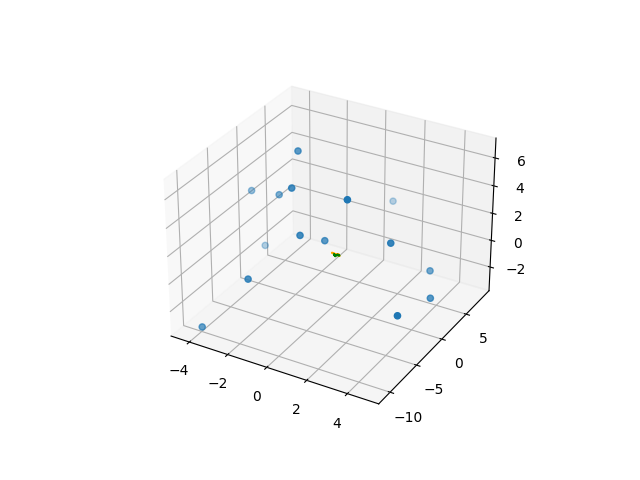

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")



In [10]:
print(sum(df['time'])/10**6, "s")
print(mse)

0.01203 s
0.006483173537299649


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
